# Using outer join to select actors
One cool aspect of using an outer join is that, because it returns all rows from both merged tables and null where they do not match, you can use it to find rows that do not have a match in the other table. To try for yourself, you have been given two tables with a list of actors from two popular movies: Iron Man 1 and Iron Man 2. Most of the actors played in both movies. Use an outer join to find actors who did not act in both movies.

The Iron Man 1 table is called iron_1_actors, and Iron Man 2 table is called iron_2_actors. Both tables have been loaded for you and a few rows printed so you can see the structure.

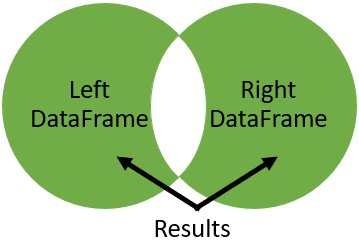

In [49]:
movies=pd.read_pickle(r'datasets/movies.p')
movies[movies['title'].str.contains('Iron Man', case='False')]


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Get id from Iron Man movies
movies=pd.read_pickle(r'datasets/movies.p')
id_iron_1 = movies[movies['title'] == 'Iron Man']['id'].values[0]
id_iron_2 = movies[movies['title'] == 'Iron Man 2']['id'].values[0]

# Get casts from both movies
casts = pd.read_pickle(r'datasets/casts.p')
iron_1_actors = casts[casts['movie_id'] == id_iron_1][['character', 'id', 'name']]
iron_2_actors = casts[casts['movie_id'] == id_iron_2][['character', 'id', 'name']]
iron_1_actors.head()

,character,id,name
3,Yinsen,17857,Shaun Toub
4,"Virginia ""Pepper"" Potts",12052,Gwyneth Paltrow
2,Obadiah Stane / Iron Monger,1229,Jeff Bridges
1,"Lt. Col. James ""Rhodey"" Rhodes / War Machine",18288,Terrence Howard
7,Christine Everhart,57451,Leslie Bibb


In [13]:
# Merge iron_1_actors to iron_2_actors on id with outer join using suffixes
iron_1_and_2 = pd.merge(
    left=iron_1_actors,
    right=iron_2_actors,
    on='id',
    how='outer',
    suffixes=['_1', '_2']
)

#iron_1_and_2[iron_1_and_2.isna().sum(axis=1)>0] # alternative method for filtering

# Create an index that returns true if name_1 or name_2 are null
#filter = (iron_1_and_2['name_1'].isnull() | iron_1_and_2['name_2'].isnull())
filter = ((iron_1_and_2['name_1'].isnull() != iron_1_and_2['name_2'].isnull()) &
     ((iron_1_and_2['name_1'].isnull()) | (iron_1_and_2['name_2'].isnull())))

# Print the first few rows of iron_1_and_2
iron_1_and_2[filter].head()

,character_1,id,name_1,character_2,name_2
0,Yinsen,17857,Shaun Toub,NaN,NaN
2,Obadiah Stane / Iron Monger,1229,Jeff Bridges,NaN,NaN
3,"Lt. Col. James ""Rhodey"" Rhodes / War Machine",18288,Terrence Howard,NaN,NaN
5,Raza,57452,Faran Tahir,NaN,NaN
8,Abu Bakaar,173810,Sayed Badreya,NaN,NaN


Nice job! Using an outer join, you were able to pick only those rows where the actor played in only one of the two movies.